<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Merging the datasets
</h1>

In [30]:
#important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN


%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

In [13]:
df_flights_eda = pd.read_csv('DM_AIAI_FlightsDB_after_eda.csv')
df_costumers_eda = pd.read_csv('DM_AIAI_CustomersDB_after_eda.csv')

In [14]:
df_flights_eda.head()

,Loyalty#,NumFlights,NumFlightsWithCompanions,PointsAccumulated,PointsRedeemed,PointsRedeemRatio,FlightsWithCompanionsRatio
0,100018,225,45,53014.30,20562.8,10.184290,6.911549
1,100102,245,55,33903.96,18760.6,22.598836,7.028860
2,100140,211,51,43192.58,4896.0,2.902193,9.935897
3,100214,108,17,36453.77,12908.6,47.362033,7.571429
4,100272,181,50,42953.25,10891.4,5.613796,9.002997


In [15]:
df_costumers_eda.head()

,Unnamed: 0,Province or State,City,Latitude,Longitude,Postal code,Education,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Income_Class,CustomerTenure,Active_Client
0,0,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,Bachelor,70146.0,Married,Star,2019-02-15,2021-12-31,3839.14,Standard,Non-Zero Income,1050,Active
1,1,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,College,0.0,Divorced,Star,2019-03-09,2021-12-31,3839.61,Standard,Zero Income,1028,Active
2,2,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,College,0.0,Single,Star,2017-07-14,2021-01-08,3839.75,Standard,Zero Income,1274,Inactive
3,3,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,College,0.0,Single,Star,2016-02-17,2021-12-31,3839.75,Standard,Zero Income,2144,Active
4,4,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,Bachelor,97832.0,Married,Star,2017-10-25,2021-12-31,3842.79,2021 Promotion,Non-Zero Income,1528,Active


In [16]:
df_costumers_eda.drop(columns=['Unnamed: 0'], inplace=True)
df_flights_eda["line_nm"] = range(len(df_flights_eda))
df_costumers_eda["line_nm"] = range(len(df_costumers_eda))

In [17]:
merged_df = df_flights_eda.merge(df_costumers_eda, on="line_nm")

In [18]:
merged_df.head()

,Loyalty#,NumFlights,NumFlightsWithCompanions,PointsAccumulated,PointsRedeemed,PointsRedeemRatio,FlightsWithCompanionsRatio,line_nm,Province or State,City,...,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Income_Class,CustomerTenure,Active_Client
0,100018,225,45,53014.30,20562.8,10.184290,6.911549,0,Ontario,Toronto,...,70146.0,Married,Star,2019-02-15,2021-12-31,3839.14,Standard,Non-Zero Income,1050,Active
1,100102,245,55,33903.96,18760.6,22.598836,7.028860,1,Alberta,Edmonton,...,0.0,Divorced,Star,2019-03-09,2021-12-31,3839.61,Standard,Zero Income,1028,Active
2,100140,211,51,43192.58,4896.0,2.902193,9.935897,2,British Columbia,Vancouver,...,0.0,Single,Star,2017-07-14,2021-01-08,3839.75,Standard,Zero Income,1274,Inactive
3,100214,108,17,36453.77,12908.6,47.362033,7.571429,3,Ontario,Toronto,...,0.0,Single,Star,2016-02-17,2021-12-31,3839.75,Standard,Zero Income,2144,Active
4,100272,181,50,42953.25,10891.4,5.613796,9.002997,4,Quebec,Hull,...,97832.0,Married,Star,2017-10-25,2021-12-31,3842.79,2021 Promotion,Non-Zero Income,1528,Active


In [ ]:
merged_df.drop(columns=['line_nm'], inplace=True)

In [21]:
merged_df.head()

,Loyalty#,NumFlights,NumFlightsWithCompanions,PointsAccumulated,PointsRedeemed,PointsRedeemRatio,FlightsWithCompanionsRatio,Province or State,City,Latitude,...,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Income_Class,CustomerTenure,Active_Client
0,100018,225,45,53014.30,20562.8,10.184290,6.911549,Ontario,Toronto,43.653225,...,70146.0,Married,Star,2019-02-15,2021-12-31,3839.14,Standard,Non-Zero Income,1050,Active
1,100102,245,55,33903.96,18760.6,22.598836,7.028860,Alberta,Edmonton,53.544388,...,0.0,Divorced,Star,2019-03-09,2021-12-31,3839.61,Standard,Zero Income,1028,Active
2,100140,211,51,43192.58,4896.0,2.902193,9.935897,British Columbia,Vancouver,49.282730,...,0.0,Single,Star,2017-07-14,2021-01-08,3839.75,Standard,Zero Income,1274,Inactive
3,100214,108,17,36453.77,12908.6,47.362033,7.571429,Ontario,Toronto,43.653225,...,0.0,Single,Star,2016-02-17,2021-12-31,3839.75,Standard,Zero Income,2144,Active
4,100272,181,50,42953.25,10891.4,5.613796,9.002997,Quebec,Hull,45.428730,...,97832.0,Married,Star,2017-10-25,2021-12-31,3842.79,2021 Promotion,Non-Zero Income,1528,Active


In [24]:
merged_df["EnrollmentDateOpening"] = pd.to_datetime(merged_df["EnrollmentDateOpening"])
merged_df["CancellationDate"] = pd.to_datetime(merged_df["CancellationDate"])
merged_df["Enroll_Year"] = merged_df["EnrollmentDateOpening"].dt.year
merged_df["Enroll_Month"] = merged_df["EnrollmentDateOpening"].dt.month
merged_df["Tenure_Days"] = (
    merged_df["CancellationDate"] - merged_df["EnrollmentDateOpening"]
).dt.days


Now that we finished merging our datasets, we are ready to start testing the diferent types of clustering methods, in this project we will test, Agglomerative, K-means and Fuzzy Clustering.

<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Clustering
</h1>

### Agglomerattive Clustering


In [25]:
merged_df.dtypes

Loyalty#                               int64
NumFlights                             int64
NumFlightsWithCompanions               int64
PointsAccumulated                    float64
PointsRedeemed                       float64
PointsRedeemRatio                    float64
FlightsWithCompanionsRatio           float64
Province or State                     object
City                                  object
Latitude                             float64
Longitude                            float64
Postal code                           object
Education                             object
Income                               float64
Marital Status                        object
LoyaltyStatus                         object
EnrollmentDateOpening         datetime64[ns]
CancellationDate              datetime64[ns]
Customer Lifetime Value              float64
EnrollmentType                        object
Income_Class                          object
CustomerTenure                         int64
Active_Cli

In [ ]:
merged_df= merged_df.drop(columns=['EnrollmentDateOpening','CancellationDate'])


KeyError: "['EnrollmentDateOpening', 'CancellationDate'] not found in axis"

In [28]:
merged_df.dtypes

Loyalty#                        int64
NumFlights                      int64
NumFlightsWithCompanions        int64
PointsAccumulated             float64
PointsRedeemed                float64
PointsRedeemRatio             float64
FlightsWithCompanionsRatio    float64
Province or State              object
City                           object
Latitude                      float64
Longitude                     float64
Postal code                    object
Education                      object
Income                        float64
Marital Status                 object
LoyaltyStatus                  object
Customer Lifetime Value       float64
EnrollmentType                 object
Income_Class                   object
CustomerTenure                  int64
Active_Client                  object
Enroll_Year                     int32
Enroll_Month                    int32
Tenure_Days                     int64
dtype: object

In [34]:
#Splitting diferent features into categorical and numerical
numerical = ['Loyalty#', 'NumFlights', 'NumFlightsWithCompanions', 'PointsAccumulated','PointsRedeemed',
             'PointsRedeemRatio', 'FlightsWithCompanionsRatio','Latitude', 'Longitude', 'Income', 'Customer Lifetime Value', 'CustomerTenure',
             'Enroll_Year', 'Enroll_Month', 'Tenure_Days']

categorical = ['Province or State', 'City', 'Postal code', 'Education', 'Marital Status', 'LoyaltyStatus', 'EnrollmentType', 'Income_Class', 'Active_Client']

In [35]:
X_cat = OneHotEncoder(sparse_output=False).fit_transform(merged_df[categorical])
X_num = StandardScaler().fit_transform(merged_df[numerical])

X = np.hstack([X_num, X_cat])
Z = linkage(X, method="ward")


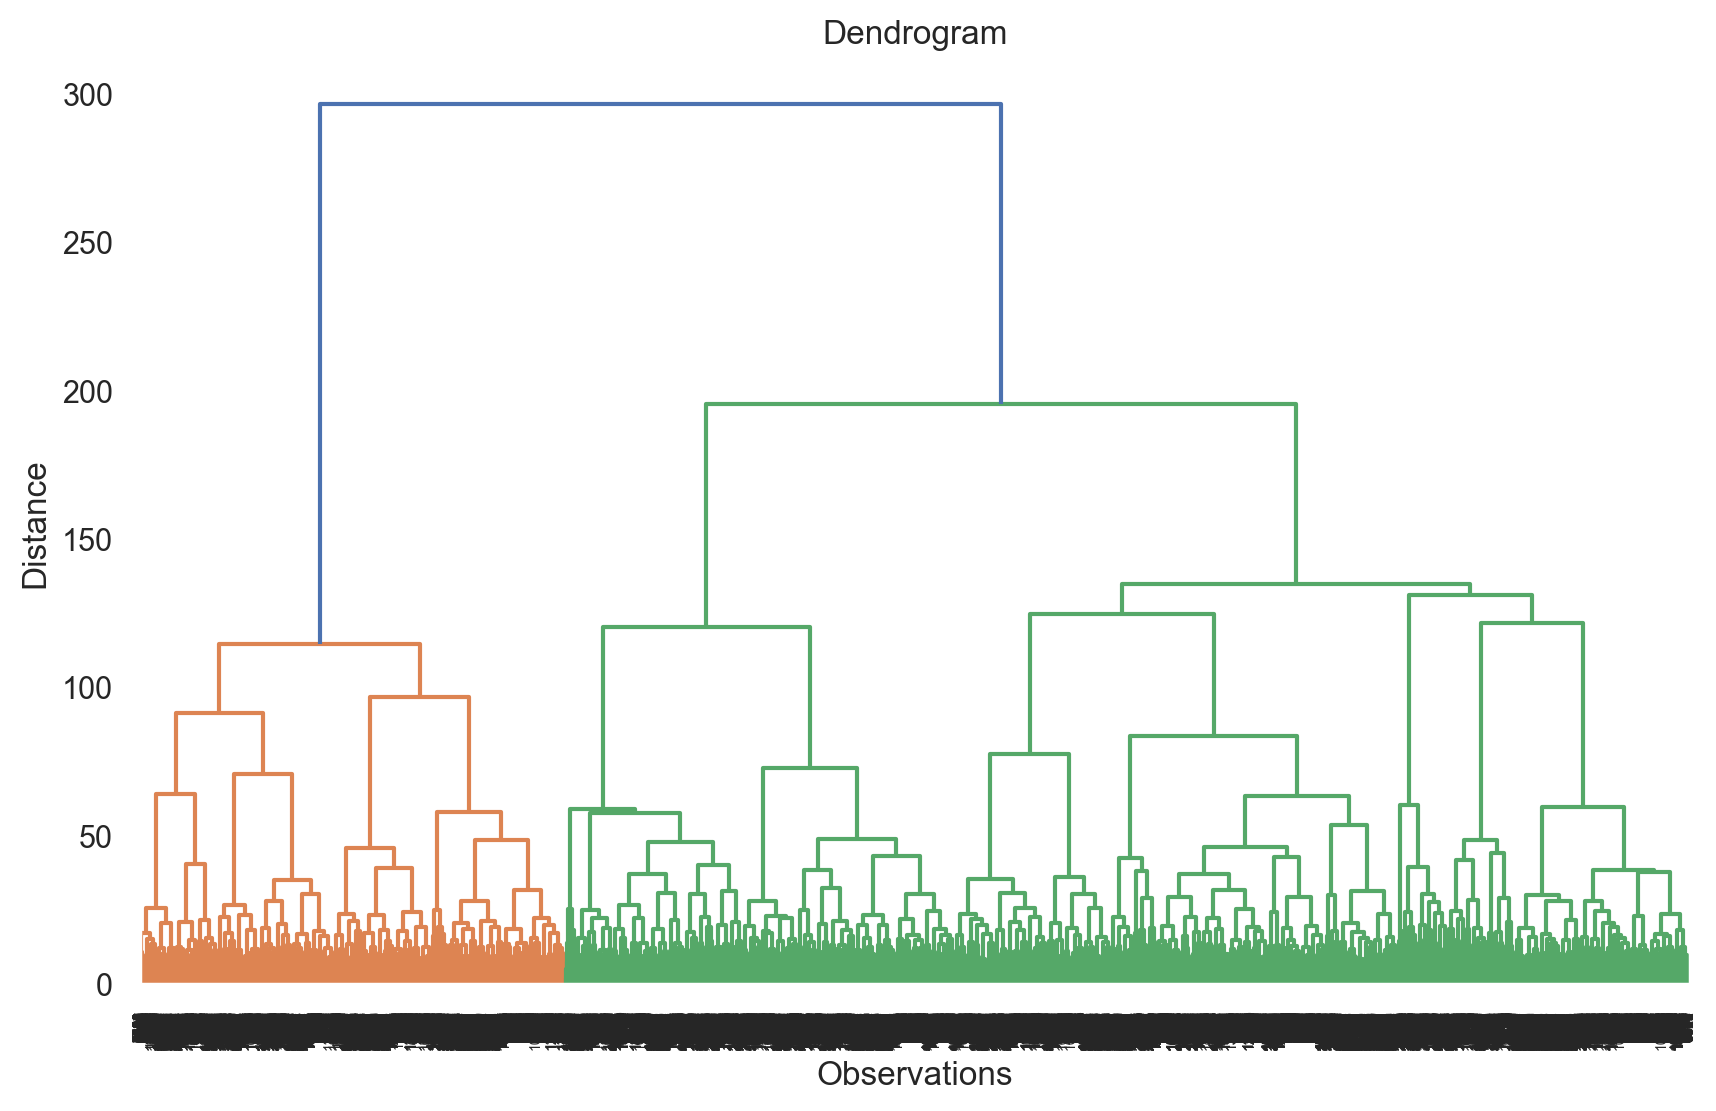

In [36]:
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()

In [37]:
hc = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

labels_hc = hc.fit_predict(X)

In [38]:
merged_df['cluster'] = labels_hc


In [39]:
merged_df.head()

,Loyalty#,NumFlights,NumFlightsWithCompanions,PointsAccumulated,PointsRedeemed,PointsRedeemRatio,FlightsWithCompanionsRatio,Province or State,City,Latitude,...,LoyaltyStatus,Customer Lifetime Value,EnrollmentType,Income_Class,CustomerTenure,Active_Client,Enroll_Year,Enroll_Month,Tenure_Days,cluster
0,100018,225,45,53014.30,20562.8,10.184290,6.911549,Ontario,Toronto,43.653225,...,Star,3839.14,Standard,Non-Zero Income,1050,Active,2019,2,1050,0
1,100102,245,55,33903.96,18760.6,22.598836,7.028860,Alberta,Edmonton,53.544388,...,Star,3839.61,Standard,Zero Income,1028,Active,2019,3,1028,2
2,100140,211,51,43192.58,4896.0,2.902193,9.935897,British Columbia,Vancouver,49.282730,...,Star,3839.75,Standard,Zero Income,1274,Inactive,2017,7,1274,2
3,100214,108,17,36453.77,12908.6,47.362033,7.571429,Ontario,Toronto,43.653225,...,Star,3839.75,Standard,Zero Income,2144,Active,2016,2,2144,0
4,100272,181,50,42953.25,10891.4,5.613796,9.002997,Quebec,Hull,45.428730,...,Star,3842.79,2021 Promotion,Non-Zero Income,1528,Active,2017,10,1528,0


### KMeans


In [40]:

inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


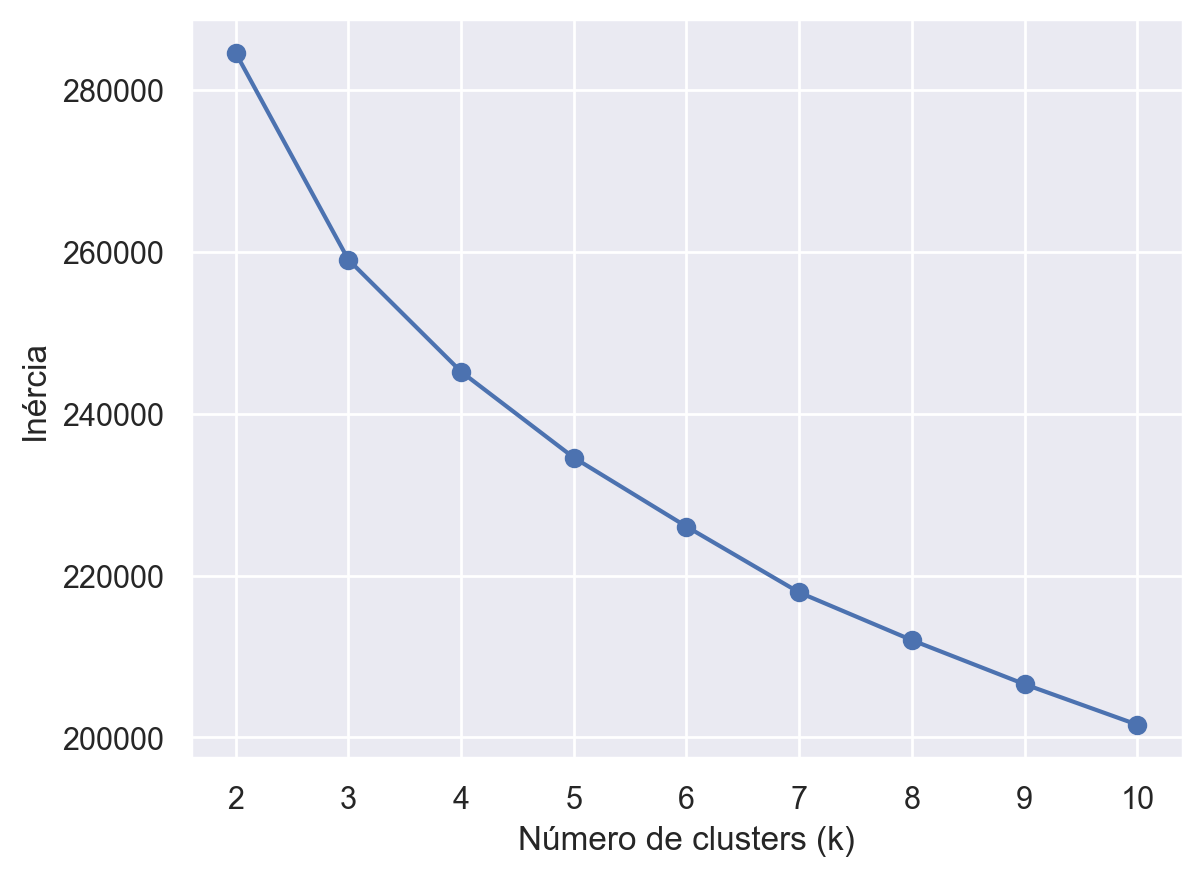

In [ ]:
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [42]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
merged_df["Kmeans"] = kmeans.fit_predict(X)

In [43]:
cluster_comparison = pd.DataFrame({
    'Hierarchical': merged_df['cluster'], 'KMeans': merged_df['Kmeans']
})

In [44]:
cluster_comparison

,Hierarchical,KMeans
0,0,2
1,2,3
2,2,3
3,0,0
4,0,0
...,...,...
16569,1,1
16570,0,0
16571,0,3
16572,0,2
